In [27]:
# 1. 실행결과를 확인하고 빈 곳을 채워 코드를 완성하세요.
import pandas as pd
import numpy as np

# 데이터 프레임 생성
df = pd.DataFrame(
    {"date": ["2023-01-01", "2023-01-02", "2023-01-03"], "price": [1000, 1200, 1300]}
)

# date 컬럼을 datetime형으로 변환
df["date"] = pd.to_datetime(df["date"])

# 결과 확인
print(df.dtypes)
print(df)

# date를 인덱스로 설정
df.set_index('date', inplace=True)

# 결과 확인
print(df.info())

date     datetime64[ns]
price             int64
dtype: object
        date  price
0 2023-01-01   1000
1 2023-01-02   1200
2 2023-01-03   1300
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2023-01-01 to 2023-01-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   3 non-null      int64
dtypes: int64(1)
memory usage: 48.0 bytes
None


In [224]:
# 2. 실행결과를 확인하고 빈 곳을 채워 코드를 완성하세요.

# 시계열 데이터 생성
df_idx = pd.date_range("2019-12-01 01:00", periods=40)
df = pd.DataFrame(range(len(df_idx)), columns=["col"], index=df_idx)

# 결과 확인
print(df.head())

# 월단위로 재조정하기
df_monthly = df.resample("M").mean()
print(df_monthly.head())

                     col
2019-12-01 01:00:00    0
2019-12-02 01:00:00    1
2019-12-03 01:00:00    2
2019-12-04 01:00:00    3
2019-12-05 01:00:00    4
             col
2019-12-31  15.0
2020-01-31  35.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22548\3998397191.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample("M").mean()


In [235]:
# 3. 2022년 12월 25일부터 100일 간격으로 날짜와 랜덤으로 생성된 값(value)을 가진 데이터프레임을 생성할 떄 빈곳을 채워 월별 price의 합계를 구하세요.

df = pd.DataFrame(
    {
        "date": pd.date_range("2022-12-25", periods=100, freq="D"),
        "value": np.random.randint(100, size=(100,)),
    }
)

# 월별 price 합계 구하기
df.set_index("date", inplace=True)
df_month = df.resample("M").sum()
print(df_month['value'])

date
2022-12-31     409
2023-01-31    1273
2023-02-28    1589
2023-03-31    1531
2023-04-30     144
Freq: ME, Name: value, dtype: int32


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22548\35247098.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = df.resample("M").sum()


In [272]:
# 4. 다음 빈 곳을 채워 일별 상품 가격 데이터 셋에서 앞으로 2일 뒤의 바나나 가격을 예측하세요.
from statsmodels.tsa.arima.model import ARIMA

# 데이터프레임 생성
data = pd.DataFrame(
    {
        "date": pd.date_range("20230101", periods=100),
        "product": ["banana"] * 50 + ["apple"] * 50,
        "price": [100] * 50 + [120] * 50,
    }
)

# 시계열 데이터 분석을 위해 인덱스를 날짜로 설정
data.set_index("date", inplace=True)

# ARIMA 모델 학습
model = ARIMA(data["price"], order=(1, 1, 0))  # ARIMA(1,1,0) 모델
model_fit = model.fit()

# 이틀 예측 값 계산
forecast = model_fit.forecast(steps=2)

# 다음날 바나나 가격 출력
print(forecast)

2023-04-11    120.0
2023-04-12    120.0
Freq: D, Name: predicted_mean, dtype: float64


c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


         Date        Open        High         Low       Close   Adj Close  \
0  2022-01-31  170.201500  172.447999  167.639500  169.861500  167.307754   
1  2022-02-28  169.635262  171.585263  167.580524  169.830001  167.455284   
2  2022-03-31  164.806956  167.164348  162.939131  165.310435  163.032566   
3  2022-04-29  167.479001  169.518500  165.083002  166.820999  164.522314   
4  2022-05-31  148.324286  150.950952  145.364284  148.430477  146.556107   

         Volume       rtn          MA         MA1  
0  1.054223e+08       NaN         NaN         NaN  
1  8.565875e+07 -0.000185  169.845750         NaN  
2  9.481740e+07 -0.026612  167.570218  168.333979  
3  8.438978e+07  0.009138  166.065717  167.320478  
4  1.143353e+08 -0.110241  157.625738  160.187304  


c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)


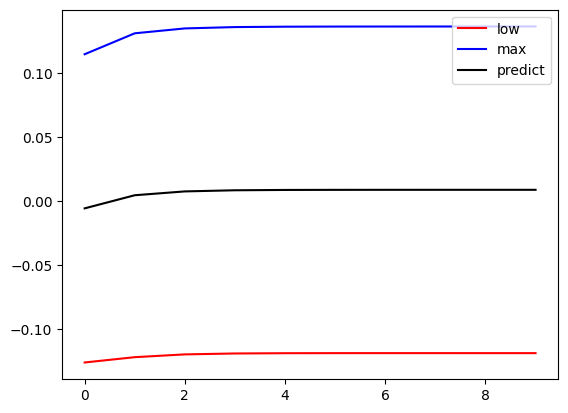

In [300]:
# 5. 다음 실행결과를 확인하고, 2015년 1월부터 2021년 12월까지 월별 고장률이 기록된 데이터 셋을 분석하여 앞으로 2개월간의 고장률을 예측하는 코드를 작성하세요.
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("../resources/11장/apple_data.csv")

# 데이터 탐색
print(df.head())

# 시계열 데이터 분석을 위해 인덱스를 날짜로 설정
df.set_index("Date", inplace=True)

# ARIMA(1,1,1) 모델 학습
model = ARIMA(df["rtn"], order=(1, 1, 1))
model_fit = model.fit()

# 10개월 고장률 데이터 예측
forecast = model_fit.get_forecast(steps=10)

# 예측 데이터 평균
predict_y = forecast.predicted_mean.tolist()

# 예측 데이터 최솟값
conf_int = forecast.conf_int()
pred_y_lower = conf_int['lower rtn'].tolist()  # 예측 값의 하한 (첫 번째 예측 값)

# 예측 데이터 최댓값
pred_y_upper = conf_int['upper rtn'].tolist()  # 예측 값의 상한 (두 번째 예측 값)

# 모델이 예측한 최저 고장률 그래프
plt.plot(pred_y_lower, color="red")

# 모델이 예측한 최고 고장률 그래프
plt.plot(pred_y_upper, color="blue")

# 모델이 예측한 평균 고장률 그래프
plt.plot(predict_y, color="black")
plt.legend(['low', 'max', 'predict'])